<center>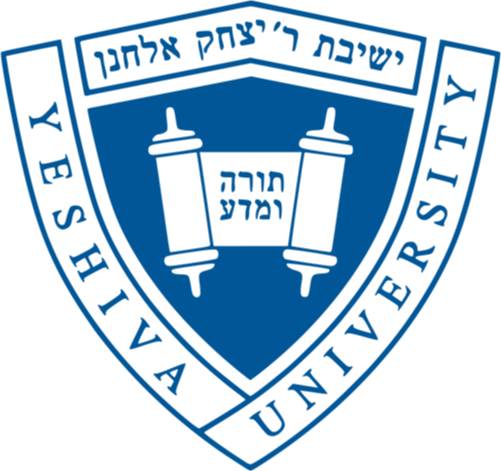</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5002 Computational Statistics and Probability</h1>
<p>
<h2 style='text-align: center;'>Homework 01</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

Solutions to be submitted on Canvas by the beginning of class on Wednesday, 9/7/22.

In [43]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings
warnings.filterwarnings("ignore")

## Task 1
__(5 points)__
Read the following problem and its solution. No need to turn in anything for problem 1, it is just here to help you solving the next problems.
<br>
A forester studying the effects of fertilization on certain pine forests in the Southeast is interested in estimating the average basal area of pine trees. In studying basal areas of similar trees for many years, he has discovered that these measurements (in square inches) are normally distributed with standard deviation approximately 4 square inches. If the forester samples n = 9 trees, find the probability that the sample mean will be within 2 square inches of the population mean.

### Solution:

In [44]:
pop_std = 4
sample_n = 9

In [45]:
sample_mean_std = pop_std / np.sqrt(sample_n)

In [46]:
z_lower = -2 / sample_mean_std
z_upper = 2 / sample_mean_std

In [47]:
cdf_lower = norm.cdf(z_lower)
cdf_upper = norm.cdf(z_upper)

In [48]:
probability = cdf_upper - cdf_lower

In [49]:
print(f"Probability that the sample mean will be within 2 square inches of the population mean: {probability * 100 :.2f} %")

Probability that the sample mean will be within 2 square inches of the population mean: 86.64 %


## Task 2
__(5 points)__
Suppose the forester in Exercise 1 would like the sample mean to be within 1 square inch of the population mean, with probability 0.9. How many trees must he measure in order to ensure this degree of accuracy?

### Solution:

In [50]:
pop_std = 4
sample_n = 9

In [51]:
probability = 0.9 

In [52]:
z_score = norm.ppf(1 - (1 - probability) / 2)

In [53]:
pop_std_dev = 4
required_accuracy = 1

In [54]:
sample_size = int(np.ceil((pop_std_dev * z_score / required_accuracy) ** 2))

In [55]:
print(f"Number of trees the forester must measure: {sample_size}")

Number of trees the forester must measure: 44


## Task 3
__(5 points)__
A binary communication channel transmits a sequence of "bits" (0s and 1s). Suppose that for any particular bit transmitted, there is a 10% chance of a transmission error (a 0 becoming a 1 or a 1 becoming a 0). Assume that bit errors occur independently of one another. Consider transmitting 1000 bits. What is the approximate probability that at most 125 transmission errors occur?

Hint: use the central limit theorem for a Bernoulli sample. You will need to use the fact that the Bernoulli distribution with parameter p has mean p and variance p(1 − p).

### Solution:

In [56]:
error_prob = 0.1
num_bits = 1000
max_errors = 125

In [57]:
mean = error_prob
variance = error_prob * (1 - error_prob)

In [58]:
sum_mean = num_bits * mean
sum_std_dev = np.sqrt(num_bits * variance)

In [59]:
z_score = (max_errors + 0.5 - sum_mean) / sum_std_dev  # Continuity correction: add 0.5 to max_errors

In [60]:
probability = norm.cdf(z_score)

In [61]:
print(f"Approximate probability that at most 125 transmission errors occur: {probability* 100 :.2f} %")

Approximate probability that at most 125 transmission errors occur: 99.64 %


## Task 4
__(10 points)__
Exercise in Python.

- Generate a sample of size n from the binomial distribution with parameters size =25 and prob = 0.4 (we denoted size by n on class and prob by p. I used the notation "size" and "prob" here to reflect the notation of the Python function np.random.negative_binomial and to avoid the confusion with the sample size n).

### Solution:

In [62]:
# Generate a single sample with the specified parameters
size = 25
prob = 0.4

sample = np.random.binomial(size, prob)

print(f"Sample from the binomial distribution: {sample}")

Sample from the binomial distribution: 10


In [63]:
# Generate 10 samples
num_samples = 10

samples = np.random.binomial(size, prob, num_samples)

print(f"Samples from the binomial distribution: {samples}")

Samples from the binomial distribution: [12  5  9 10  9  9  8 11 15  8]


- Compute the sample mean $\bar{X}$.

### Solution:

In [64]:
sample_mean = np.mean(samples)

print(f"Sample mean (X̄): {sample_mean}")

Sample mean (X̄): 9.6


- For all choices of n = 5; 10; 20; 40 and N = 2000, create a histogram of the sample means. Turn in the script file and your 4 histograms electronically.

### Solution:

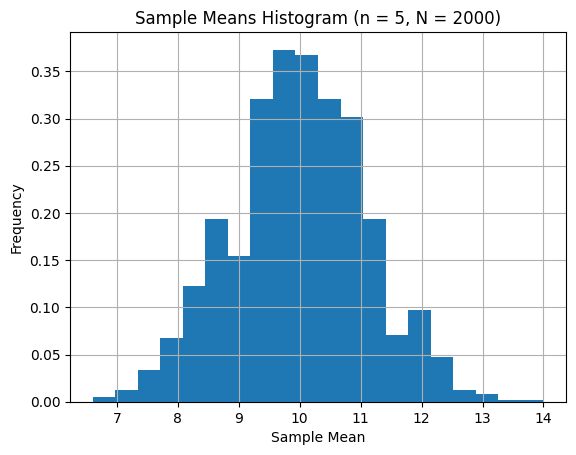

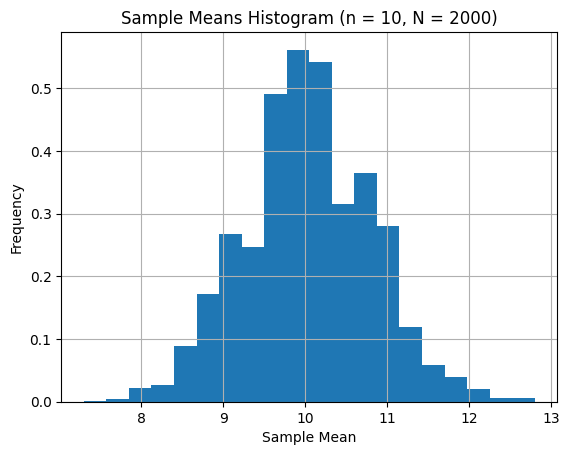

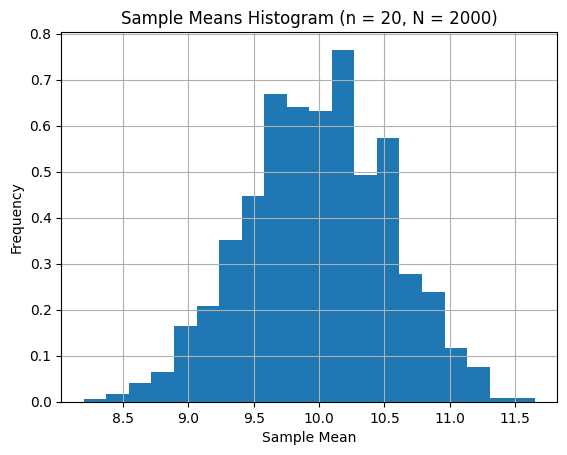

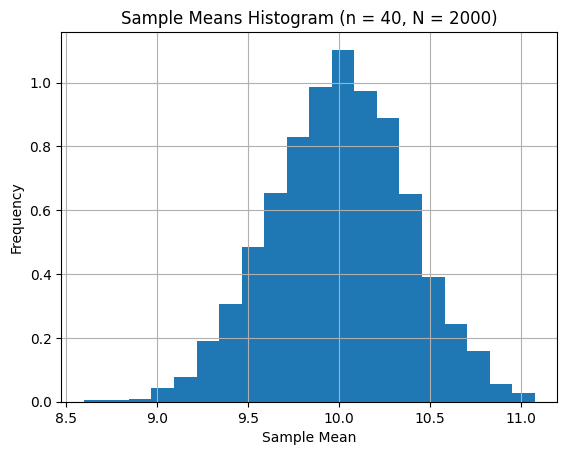

In [65]:
size = 25
prob = 0.4
N = 2000
sample_sizes = [5, 10, 20, 40]

for n in sample_sizes:
    sample_means = []

    for _ in range(N):
        samples = np.random.binomial(size, prob, n)
        sample_mean = np.mean(samples)
        sample_means.append(sample_mean)

    plt.hist(sample_means, bins=20, density=True)
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.title(f"Sample Means Histogram (n = {n}, N = {N})")
    plt.grid(True)
    plt.savefig(f"histogram_n_{n}_N_{N}.png")
    plt.show()